In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt       # Standard plotting library                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats 

In [3]:
df_clean=pd.read_csv(r'C:\Users\Smegn\Documents\GitHub\PythonPackageStructure\data\clean_Data.csv')

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      150001 non-null  int64  
 1   Bearer Id                       150001 non-null  object 
 2   Start                           150001 non-null  object 
 3   Start ms                        150001 non-null  float64
 4   End                             150001 non-null  object 
 5   End ms                          150001 non-null  float64
 6   Dur. (ms)                       150001 non-null  float64
 7   IMSI                            150001 non-null  float64
 8   MSISDN/Number                   150001 non-null  float64
 9   IMEI                            150001 non-null  float64
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [6]:
#aggregate total ul and dl using MSISDN/Number
df_group1=df_clean.groupby("MSISDN/Number", as_index=True)[['Total UL (Bytes)', 'Total DL (Bytes)','Dur. (ms)']].mean()

# multivarate analysis

In [13]:
df_group1["sum(Total UL (Bytes)+Total UL (Bytes))"]= df_group1["Total UL (Bytes)"] + df_group1["Total UL (Bytes)"]

print(df_group1["sum(Total UL (Bytes)+Total UL (Bytes))"])

MSISDN/Number
3.360100e+10     72106216.0
3.360100e+10     72208918.0
3.360100e+10     78613640.0
3.360101e+10     40655052.0
3.360101e+10     94280527.0
                   ...     
3.379000e+10     53432858.0
3.379000e+10     71464486.0
3.197021e+12     74591830.0
3.370000e+14    113305678.0
8.823971e+14    120912098.0
Name: sum(Total UL (Bytes)+Total UL (Bytes)), Length: 106856, dtype: float64


In [15]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sb.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

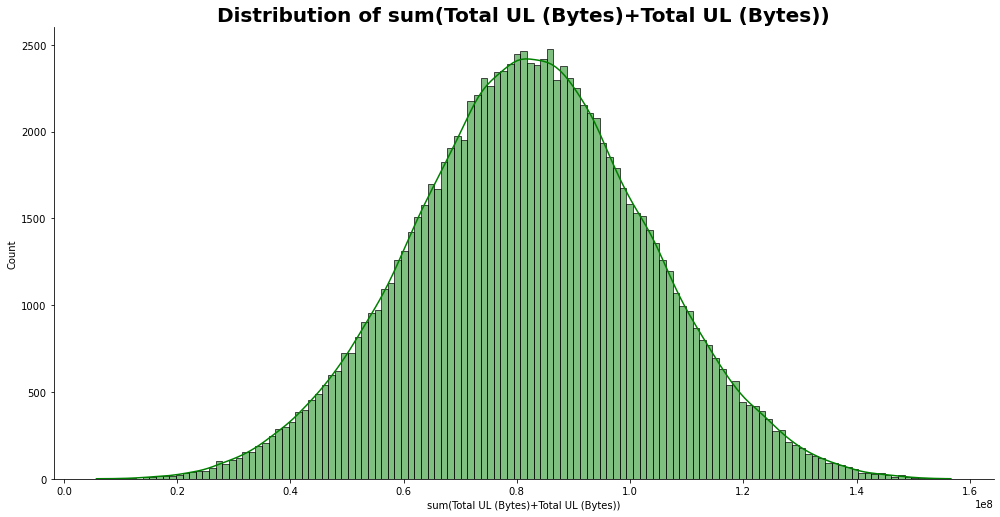

In [16]:
plot_hist(df_group1, "sum(Total UL (Bytes)+Total UL (Bytes))", "green")

In [21]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sb.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.show()

In [27]:
#select columns with havibng number datatype
df_new=df_clean.select_dtypes(np.number).head()

In [29]:
#statstical dispersion of numerical columns
df_new.describe(include="all")

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.0,5.000000,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,2.000000,411.400000,609.000000,1.392207e+06,2.082013e+14,3.371152e+10,3.547207e+13,48.400000,5.0,19.000000,...,1.849503e+07,1.408443e+07,1.504887e+07,6.911990e+06,4.887325e+08,6.058002e+06,4.818181e+08,1.095858e+07,4.006016e+07,5.314478e+08
std,1.581139,298.871712,280.862956,2.668021e+05,5.884296e+08,4.214225e+07,1.999601e+11,9.370165,0.0,15.716234,...,2.756649e+06,6.796098e+06,4.171594e+06,6.901172e+06,2.366720e+08,6.204045e+06,2.117728e+08,4.442369e+06,9.499696e+06,2.388042e+08
min,0.000000,1.000000,171.000000,1.089009e+06,2.082003e+14,3.366496e+10,3.528151e+13,42.000000,5.0,6.000000,...,1.525938e+07,2.501332e+06,8.198936e+06,4.152180e+05,2.295846e+08,3.956300e+05,1.717444e+08,4.215763e+06,2.788364e+07,2.798073e+08
25%,1.000000,235.000000,606.000000,1.321509e+06,2.082014e+14,3.368185e+10,3.535661e+13,45.000000,5.0,6.000000,...,1.585461e+07,1.469958e+07,1.399465e+07,1.097942e+06,2.780823e+08,1.170709e+06,4.106926e+08,8.814393e+06,3.674974e+07,3.088796e+08
50%,2.000000,486.000000,652.000000,1.361762e+06,2.082014e+14,3.369980e+10,3.540701e+13,45.000000,5.0,16.000000,...,1.972566e+07,1.514664e+07,1.712458e+07,6.163408e+06,5.277072e+08,3.529801e+06,5.269042e+08,1.279728e+07,3.854281e+07,5.691386e+08
75%,3.000000,565.000000,662.000000,1.365104e+06,2.082014e+14,3.375034e+10,3.552121e+13,45.000000,5.0,23.000000,...,2.024740e+07,1.896287e+07,1.758779e+07,9.656251e+06,6.087501e+08,1.084972e+07,5.507095e+08,1.391032e+07,4.332422e+07,6.533850e+08
max,4.000000,770.000000,954.000000,1.823652e+06,2.082019e+14,3.376063e+10,3.579401e+13,65.000000,5.0,44.000000,...,2.138812e+07,1.911173e+07,1.833841e+07,1.722713e+07,7.995382e+08,1.434415e+07,7.490399e+08,1.505514e+07,5.380039e+07,8.460285e+08


In [35]:
plot_bar(df_group1,'Dur. (ms)','sum(Total UL (Bytes)+Total UL (Bytes))',"session vs app","session","total data volume" )

KeyboardInterrupt: 

<Figure size 864x504 with 0 Axes>

In [59]:
#copy columns from other data frame 
total_data_volume=df_clean['Total UL (Bytes)']+ df_clean['Total DL (Bytes)']
df_clean['total_data_volume']=total_data_volume

total_social=df_clean['Social Media DL (Bytes)']+ df_clean['Social Media UL (Bytes)']
df_clean['total_social']=total_social

total_google=df_clean['Google DL (Bytes)']+ df_clean['Google UL (Bytes)']
df_clean['total_google']=total_google

total_Email=df_clean['Email DL (Bytes)']+ df_clean['Email UL (Bytes)']
df_clean['total_Email']=total_Email

total_youtube=df_clean['Youtube DL (Bytes)']+ df_clean['Youtube UL (Bytes)']
df_clean['total_youtube']=total_youtube

total_netflix=df_clean['Netflix DL (Bytes)']+ df_clean['Netflix UL (Bytes)']
df_clean['total_netflix']=total_netflix

total_gaming=df_clean['Gaming DL (Bytes)']+ df_clean['Gaming UL (Bytes)']
df_clean['total_gaming']=total_gaming

total_other=df_clean['Other DL (Bytes)']+ df_clean['Other UL (Bytes)']
df_clean['total_other']=total_other

In [61]:
 #correlate each app with total UL+total DL
df_clean.plot(x="total_data_volume", y=["total_other", "total_gaming", "total_netflix"], kind="bar")
 


 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000229F5D69D30> (for post_execute):


KeyboardInterrupt: 

KeyboardInterrupt: 

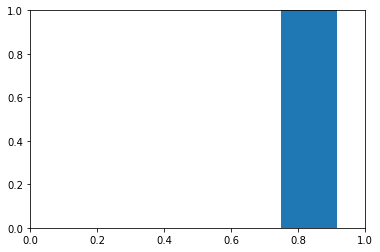

In [161]:
df_clean[["total_data_volume", "total_other", "total_gaming", "total_netflix"]].plot(x="total_data_volume", kind="bar")

In [63]:
#segment the users into top five decile classes based on the total duration for all sessions
users_per_decile = pd.qcut(df_clean['Dur. (ms)'], 10,duplicates='drop')

In [64]:
users_per_decile

0         (181414.0, 1859336.0]
1         (181414.0, 1859336.0]
2         (181414.0, 1859336.0]
3         (181414.0, 1859336.0]
4         (181414.0, 1859336.0]
                  ...          
149996       (72290.0, 86399.0]
149997      (92514.0, 115969.0]
149998      (92514.0, 115969.0]
149999      (92514.0, 115969.0]
150000       (72290.0, 86399.0]
Name: Dur. (ms), Length: 150001, dtype: category
Categories (9, interval[float64]): [(7141.999, 28066.0] < (28066.0, 45960.0] < (45960.0, 72290.0] < (72290.0, 86399.0] ... (92514.0, 115969.0] < (115969.0, 148355.0] < (148355.0, 181414.0] < (181414.0, 1859336.0]]

In [66]:
#creat correlation matrix
df = pd.DataFrame(df_clean,columns=['total_other','total_gaming','total_netflix','total_youtube','total_Email','total_google','total_social'])

In [67]:
corrMatrix = df.corr()
print (corrMatrix)

               total_other  total_gaming  total_netflix  total_youtube  \
total_other       1.000000     -0.002661      -0.009033       0.002969   
total_gaming     -0.002661      1.000000      -0.003109      -0.002999   
total_netflix    -0.009033     -0.003109       1.000000       0.002882   
total_youtube     0.002969     -0.002999       0.002882       1.000000   
total_Email      -0.001299     -0.000644       0.001029      -0.002919   
total_google     -0.001727     -0.000994      -0.001902       0.002277   
total_social      0.006065      0.001082       0.001013       0.000548   

               total_Email  total_google  total_social  
total_other      -0.001299     -0.001727      0.006065  
total_gaming     -0.000644     -0.000994      0.001082  
total_netflix     0.001029     -0.001902      0.001013  
total_youtube    -0.002919      0.002277      0.000548  
total_Email       1.000000     -0.000412      0.004032  
total_google     -0.000412      1.000000     -0.001708  
total_so

##interpretation of correlation##

Positive correlation: -Social media is positivelly correlated with all apps except google media

                     - google media                "           with youtube 
                     
                     - email                 "  "                with netflix and social media
                     
                     - youtube               "  "               with google, social media,and other
                     
                    - netflix             "  "                with youtube,email and social
                    
                    - gaiming               "  "               with social only
                    
                    - other                " "                 youtube and social.
                    
Positive correlation mens for our case there are users which uses one and others.

In [88]:
#Dimensionality Reduction 
from sklearn.preprocessing import StandardScaler
x =df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [89]:
x.shape

(150001, 7)

In [93]:
#check whether the normalized data has a mean of zero and a standard deviation of one.
np.mean(x),np.std(x)
#convert the normalized features into a tabular format with the help of DataFrame.
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_df = pd.DataFrame(x,columns=feat_cols)
normalised_df.tail()
#several components represent the lower dimension in which we have to project to higher dimension data.

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
149996,-1.696132e+00,4.322357e-01,1.612525e+00,0.574429,-1.464119,1.415541e+00,1.630693e+00
149997,1.172672e+00,8.249149e-01,1.945265e+00,-0.051690,-0.128264,-9.646017e-01,5.058992e-01
149998,-1.220673e+00,5.597951e-01,-8.205461e-01,0.202550,-0.187493,-3.474641e-01,-5.484625e-01
149999,1.589835e+00,-3.084457e-01,-6.623371e-01,-0.597071,0.552524,-1.422689e-02,-9.705483e-01
150000,2.450171e-16,-2.442622e-16,-4.022649e-16,0.000000,0.000000,-2.648505e-16,2.248175e-16


In [94]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(x)


In [98]:
#create a DataFrame that will have the principal component values for all 150001 samples
principal_df_Data = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2'])
principal_df_Data.tail()
#calculate the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))
# result shows 14% of data holds by pca component 1 and 14% by pca component 2

Explained variation per principal component: [0.14435994 0.14375118]


<Figure size 432x288 with 0 Axes>

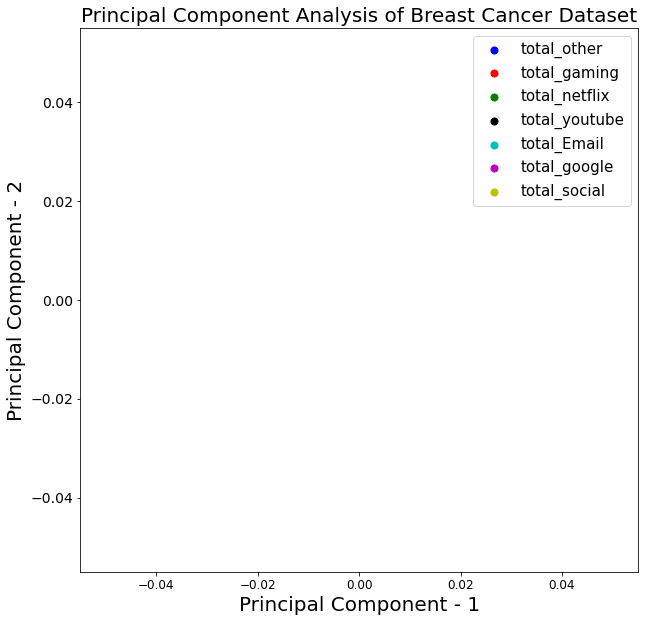

In [101]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['total_other','total_gaming','total_netflix','total_youtube','total_Email','total_google','total_social']
colors = ['b','r','g','k','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = df['total_Email'] == target
    plt.scatter(principal_df_Data.loc[indicesToKeep, 'principal component 1']
               , principal_df_Data.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# Task 2 - User Engagement analysis


In [124]:
#session frequency
count = df_clean.groupby(['MSISDN/Number']).count()


In [154]:
# sum of xDR session,Total download and upload and session duration for each user.
count1=df_clean["Dur. (ms)"].groupby(df_clean['MSISDN/Number']).sum()
count1
count2=df_clean["Total DL (Bytes)"].groupby(df_clean['MSISDN/Number']).sum()
count3=df_clean["Total UL (Bytes)"].groupby(df_clean['MSISDN/Number']).sum()
count2,count3

(MSISDN/Number
 3.360100e+10    8.426375e+08
 3.360100e+10    1.207552e+08
 3.360100e+10    5.566597e+08
 3.360101e+10    4.019932e+08
 3.360101e+10    1.363130e+09
                     ...     
 3.379000e+10    6.879252e+08
 3.379000e+10    4.445751e+08
 3.197021e+12    1.948281e+08
 3.370000e+14    5.396350e+08
 8.823971e+14    7.869760e+07
 Name: Total DL (Bytes), Length: 106856, dtype: float64,
 MSISDN/Number
 3.360100e+10    36053108.0
 3.360100e+10    36104459.0
 3.360100e+10    39306820.0
 3.360101e+10    20327526.0
 3.360101e+10    94280527.0
                    ...    
 3.379000e+10    26716429.0
 3.379000e+10    35732243.0
 3.197021e+12    37295915.0
 3.370000e+14    56652839.0
 8.823971e+14    60456049.0
 Name: Total UL (Bytes), Length: 106856, dtype: float64)

In [158]:
#aggregate
# group by customer ID, get mean, min, and max value of session frequency for each value of cuMI.
#aggregate
# group by customer ID, get mean, min, and max value of session frequency for each value of cuMI.
grouped_single = df_clean.groupby('MSISDN/Number').agg({'count1': ['mean', 'min', 'max']})

print(grouped_single)

              count1              
                mean    min    max
MSISDN/Number                     
3.360100e+10  -140.0 -140.0 -140.0
3.360100e+10    37.0   37.0   37.0
3.360100e+10  -374.0 -374.0 -374.0
3.360101e+10   -24.0  -24.0  -24.0
3.360101e+10  -226.5 -323.0 -130.0
...              ...    ...    ...
3.379000e+10   312.0  312.0  312.0
3.379000e+10   341.0  341.0  341.0
3.197021e+12  -325.0 -325.0 -325.0
3.370000e+14   799.0  799.0  799.0
8.823971e+14  -200.0 -200.0 -200.0

[106856 rows x 3 columns]


In [151]:
plt.scater(grouped_single['count1'])

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106856 entries, 33601001722.0 to 882397108489451.0
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (count1, mean)  106856 non-null  float64
 1   (count1, min)   106856 non-null  float64
 2   (count1, max)   106856 non-null  float64
dtypes: float64(3)
memory usage: 3.3 MB


In [140]:
cols = df_clean.columns[2:4]
mapping = {0: 'weak', 1: 'average', 2: 'best'}

def cluster(X):
    k_means = KMeans(n_clusters=3).fit(X)
    return X.groupby(k_means.labels_)\
            .transform('mean').sum(1)\
            .rank(method='dense').sub(1)\
            .astype(int).to_frame()

df_clean['Cluster_id'] = df_clean.groupby('MSISDN/Number')[cols].apply(cluster)
df_clean['Cluster_cat'] = df_clean['Cluster_id'].map(mapping)

ValueError: could not convert string to float: '2019-04-25 04:53:40'

In [ ]:
#top 3 used apps
#top 3 most used applications
'total_other','total_gaming','total_netflix','total_youtube','total_Email','total_google','total_social'

In [ ]:
df_clean['combined']=df_clean.apply(lambda x:'%s_%s' % (x['total_other'],x['total_gaming']),axis=1)